In [1]:
import pandas as pd
print(pd.__version__)

2.0.3


**We will need to figure out the medium of storing the data for our project, for now I sent everyone a link to my OneDrive**

In [6]:
p = r'C:\Users\jaman\OneDrive\equity_factors_daily_with_st\equity_factors_daily_with_st\adjClose.pkl'
data = pd.read_pickle(p)
data['adjClose'] = data['adjClose'].astype("float32")

data.info()
print(data.head(20))
print(data.shape)


<class 'pandas.core.frame.DataFrame'>
MultiIndex: 40288216 entries, (Timestamp('1997-12-31 00:00:00'), 'A1') to (Timestamp('2022-07-25 00:00:00'), 'ZYXI')
Data columns (total 1 columns):
 #   Column    Dtype  
---  ------    -----  
 0   adjClose  float32
dtypes: float32(1)
memory usage: 307.6+ MB
                    adjClose
date       ticker           
1997-12-31 A1      17.188000
           AAB     16.500000
           AABC    10.109300
           AAC1     7.438000
           AACB    12.750000
           AACE    11.375000
           AADV    70.875000
           AAGIY1   3.750000
           AAH     20.562000
           AAI      4.000000
           AAI1     1.125000
           AAIC    58.793499
           AAIIQ    2.250000
           AAIIQ1  11.000000
           AAME     4.624800
           AAMRQ   32.457001
           AAN1     5.741000
           AANB     5.341500
           AAON     0.555900
           AAP1    19.500000
(40288216, 1)


**Find the total number of unique tickers over time**

<Axes: xlabel='date'>

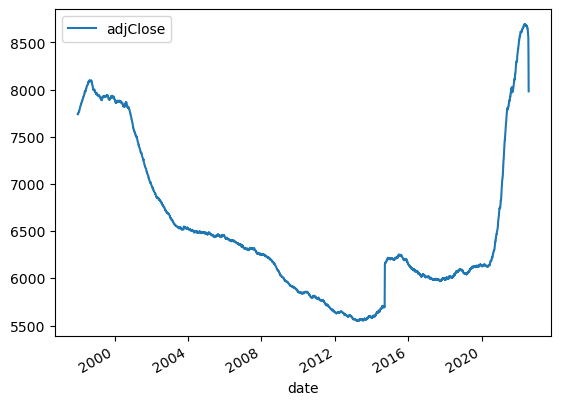

In [8]:
data.groupby('date').count().plot("title")

**Filter a "liquid" index of stocks by making sure the median on a rolling 3month basis has a price > $5**

In [9]:
data['median5'] = data.groupby('ticker')['adjClose'].rolling(60).median().reset_index(0,drop=True)

<Axes: title={'center': 'Number of stocks with median5>=5'}, xlabel='date'>

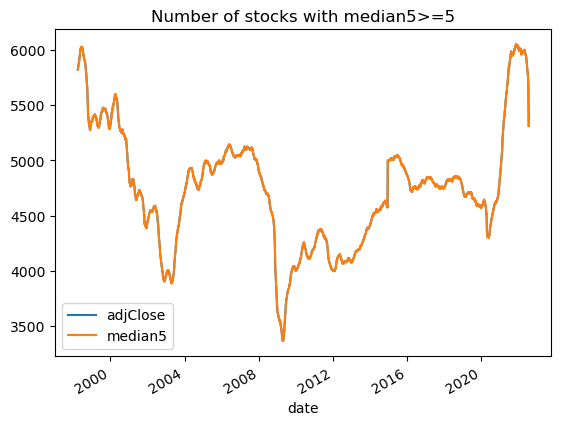

In [11]:
data.loc[data.median5>=5.].groupby('date').count().plot(title="Number of stocks with median5>=5")